In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv('state_latest.csv')
data.tail()

,state,state_code,total_doses,total_vaccinated,total_fully_vaccinated,population,last_updated,ref
33,Tripura,TR,1282367,912966,369401,4169794.0,4/5/2021,https://www.mohfw.gov.in/pdf/CumulativeCOVIDVa...
34,Uttar Pradesh,UP,12865305,10420459,2444846,237882725.0,4/5/2021,https://www.mohfw.gov.in/pdf/CumulativeCOVIDVa...
35,Uttarakhand,UK,2111065,1677190,433875,11250858.0,4/5/2021,https://www.mohfw.gov.in/pdf/CumulativeCOVIDVa...
36,West Bengal,WB,11243084,8712185,2530899,99609303.0,4/5/2021,https://www.mohfw.gov.in/pdf/CumulativeCOVIDVa...
37,Miscellaneous,MISC,3001735,1677577,1324158,NaN,4/5/2021,https://www.mohfw.gov.in/pdf/CumulativeCOVIDVa...


In [4]:
data.shape

(38, 8)

In [6]:
data.isnull().sum()

state                     0
state_code                0
total_doses               0
total_vaccinated          0
total_fully_vaccinated    0
population                1
last_updated              0
ref                       0
dtype: int64

In [5]:
data.columns

Index(['state', 'state_code', 'total_doses', 'total_vaccinated',
       'total_fully_vaccinated', 'population', 'last_updated', 'ref'],
      dtype='object')

In [7]:
#Preprocessing
data.drop('ref',axis=1,inplace=True)

data['1st_dose'] = data['total_doses']

data['2nd_dose'] = data['total_vaccinated']

In [8]:
data.head()

,state,state_code,total_doses,total_vaccinated,total_fully_vaccinated,population,last_updated,1st_dose,2nd_dose
0,A & N Islands,AN,106203,94599,11604,417036.0,4/5/2021,106203,94599
1,Andhra Pradesh,AP,6729038,5192245,1536793,53903393.0,4/5/2021,6729038,5192245
2,Arunachal Pradesh,AR,252285,193635,58650,1570458.0,4/5/2021,252285,193635
3,Assam,AS,2673320,2094437,578883,35607039.0,4/5/2021,2673320,2094437
4,Bihar,BR,7217903,6012682,1205221,124799926.0,4/5/2021,7217903,6012682


In [9]:
performance = data.copy()

performance.drop(['total_doses','total_vaccinated'],axis=1,inplace=True)

In [10]:
performance.head()

,state,state_code,total_fully_vaccinated,population,last_updated,1st_dose,2nd_dose
0,A & N Islands,AN,11604,417036.0,4/5/2021,106203,94599
1,Andhra Pradesh,AP,1536793,53903393.0,4/5/2021,6729038,5192245
2,Arunachal Pradesh,AR,58650,1570458.0,4/5/2021,252285,193635
3,Assam,AS,578883,35607039.0,4/5/2021,2673320,2094437
4,Bihar,BR,1205221,124799926.0,4/5/2021,7217903,6012682


In [25]:
high = performance.groupby(['state', 'total_fully_vaccinated']).size().reset_index()
high = high.sort_values(ascending=False ,by='total_fully_vaccinated')
high

,state,total_fully_vaccinated,0
11,Gujarat,2722190,1
21,Maharashtra,2685938,1
37,West Bengal,2530899,1
35,Uttar Pradesh,2444846,1
30,Rajasthan,2342871,1
16,Karnataka,1647241,1
1,Andhra Pradesh,1536793,1
17,Kerala,1419076,1
32,Tamil Nadu,1417446,1
24,Miscellaneous,1324158,1


Text(0.5, 1.0, 'Toatal Fully Vaccinated 1st 10 states')

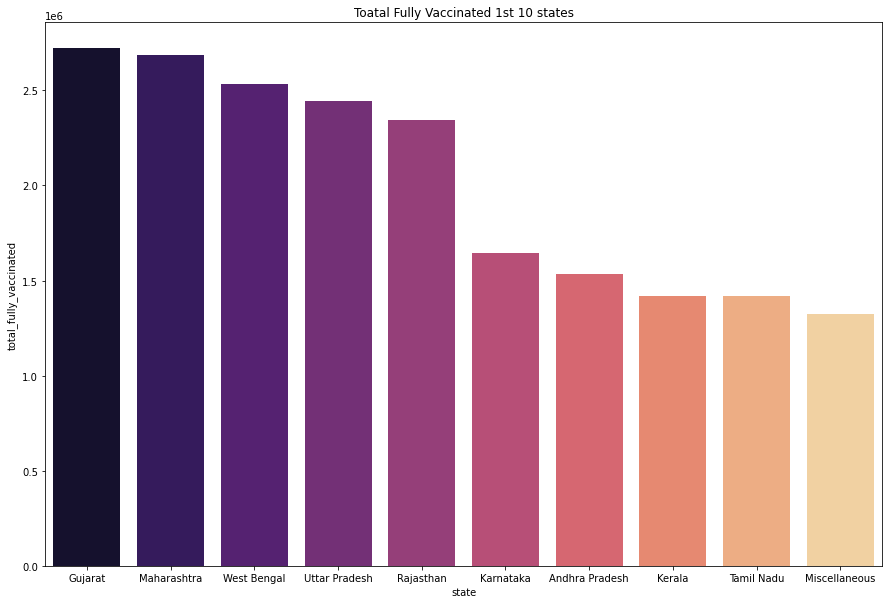

In [68]:
#plotting
#lt.rcParams['figure.figsize'](15,10)
sns.barplot(x=high['state'][:10],y=high['total_fully_vaccinated'][:10],palette='magma')
plt.title('Toatal Fully Vaccinated 1st 10 states')

In [47]:
#Checking vaccination on the bassis of population
dose1 = performance.groupby(['state', 'population','1st_dose']).size().reset_index().rename(columns={0:'Count'})
dose2 = performance.groupby(['state', 'population','2nd_dose']).size().reset_index().rename(columns={0:'Count'})

In [56]:
dose1.drop('Count',axis=1,inplace=True)

In [57]:
dose2.drop('Count',axis=1,inplace=True)

In [58]:
plot1 = dose1.sort_values(by='1st_dose')

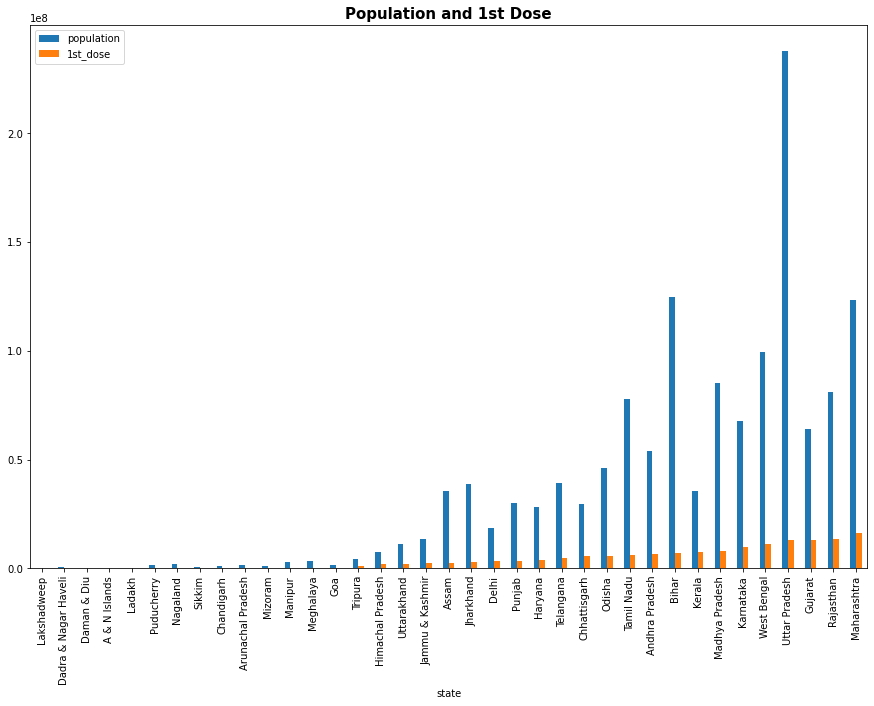

In [59]:

plot1.plot(kind='bar',x='state')
plt.title('Population and 1st Dose', fontweight='bold',fontsize=15)
plt.show()

- The population rate and the 1st dose has a huge differnce

In [60]:
plot2 = dose2.sort_values(by='2nd_dose')

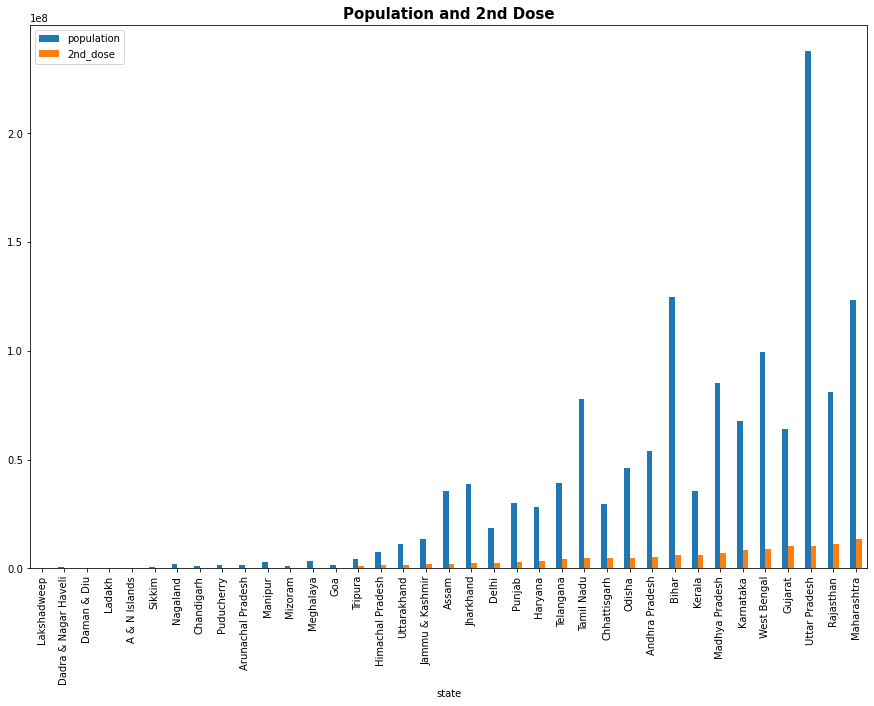

In [63]:
plot2.plot(kind='bar',x='state')
plt.title('Population and 2nd Dose', fontweight='bold',fontsize=15)
plt.show()

- 2nd dose also there is a huge diffrence

In [65]:
#population with total vaccinated
Total_vac= data[['population', 'total_fully_vaccinated', 'state']].groupby(['state']).mean().sort_values(by='total_fully_vaccinated',ascending=False)

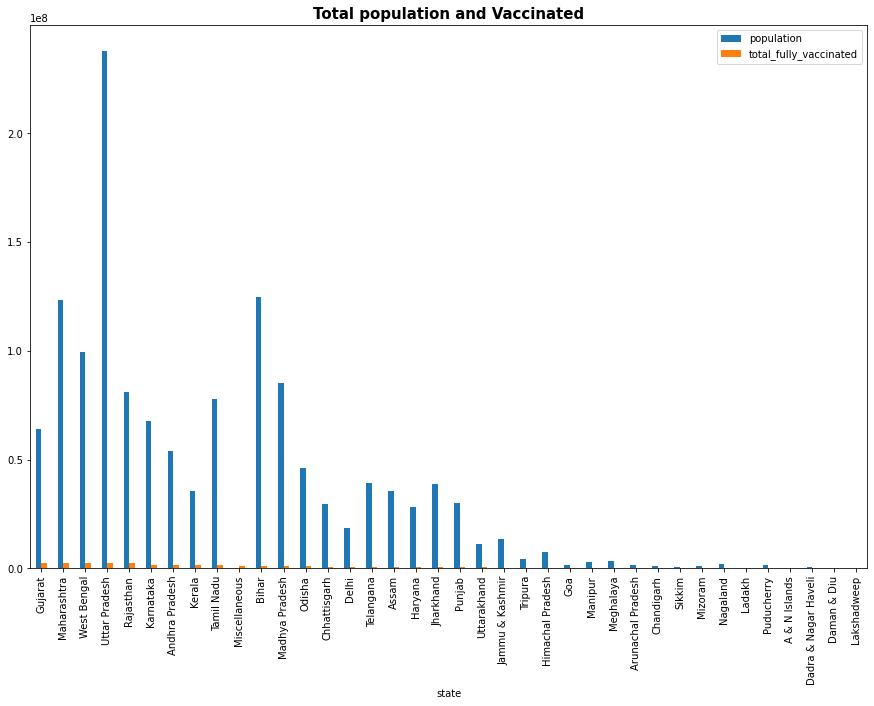

In [66]:
Total_vac.plot(kind='bar')
plt.title('Total population and Vaccinated', fontweight='bold',fontsize=15)
plt.show()

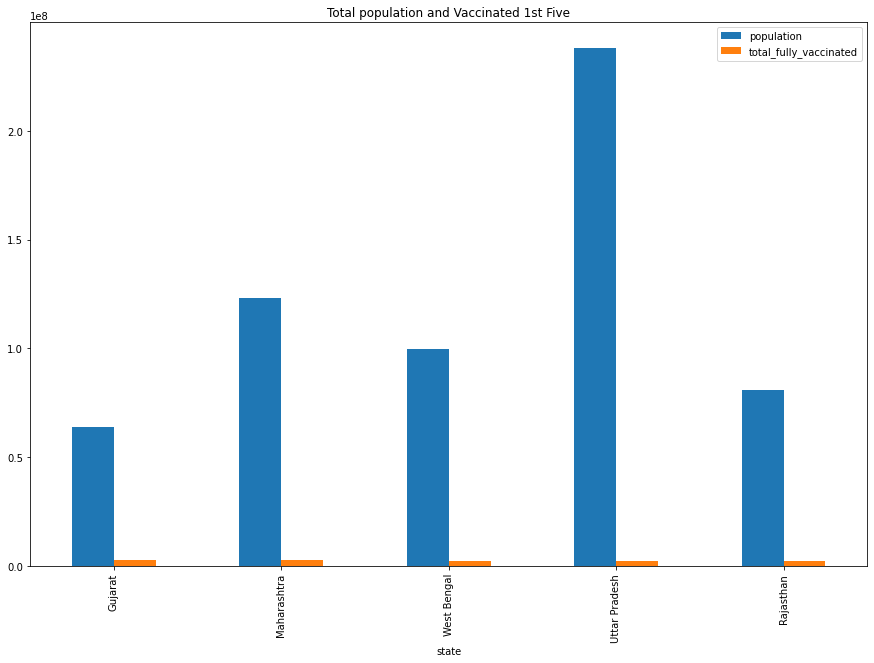

In [69]:
Total_vac[:5].plot(kind='bar')
plt.title('Total population and Vaccinated 1st Five')
plt.show()

- Gujarat, Maharashtra, WestBengal ,Uttar Pradesh and Rajasthan has the higher rate of total fully vaccinated 
- We can also say population is very far from total vaccinated